In [3]:
h_hmr='data/meth/h/Human_H1.hmr'
h,hg=hmr2df(h_hmr)

33773,

/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/2985342134.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs['r']=gs.apply(lambda x:set(range(x['b'],x['e'])) if x['e']-x['b']< 5*10**4 else set() ,axis=1)


33773


In [4]:
t_hmr='data/meth/t4/t4.hmr'
t,tg=hmr2df(t_hmr)

52648,

/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/2985342134.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs['r']=gs.apply(lambda x:set(range(x['b'],x['e'])) if x['e']-x['b']< 5*10**4 else set() ,axis=1)


52648


In [6]:
s_tmr='data/meth/skin/skin.hmr'
s,sg=hmr2df(s_tmr)

95351,

/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/2985342134.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs['r']=gs.apply(lambda x:set(range(x['b'],x['e'])) if x['e']-x['b']< 5*10**4 else set() ,axis=1)


95351


In [ ]:
f_hmr='data/meth/fib/fib.hmr'
f,fg=hmr2df(f_hmr)

In [7]:
h['t']=h.apply(lambda x:tg[x['ch']].isdisjoint(x['r']),1)
h['s']=h.apply(lambda x:sg[x['ch']].isdisjoint(x['r']),1)
h['f']=h.apply(lambda x:fg[x['ch']].isdisjoint(x['r']),1)
t['h']=t.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)
t['s']=t.apply(lambda x:sg[x['ch']].isdisjoint(x['r']),1)
t['f']=t.apply(lambda x:fg[x['ch']].isdisjoint(x['r']),1)

In [8]:
s['h']=s.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)
s['t']=s.apply(lambda x:tg[x['ch']].isdisjoint(x['r']),1)
s['f']=s.apply(lambda x:fg[x['ch']].isdisjoint(x['r']),1)
f['h']=f.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)
f['t']=f.apply(lambda x:tg[x['ch']].isdisjoint(x['r']),1)
f['s']=f.apply(lambda x:sg[x['ch']].isdisjoint(x['r']),1)

In [14]:
f.h.value_counts()

True     52580
False    21336
Name: h, dtype: int64

In [ ]:
bws=glob.glob('data/meth/t4/*.meth.bw')
names=['o','y']
bws.sort()
for i in range(len(bws)):
    name=names[i]
    bw=pyBigWig.open(bws[i])
    t[name]=t.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)

In [45]:
s['dd']=s['o']-t['y']
su=t[s.dd>.1].copy()
print(len(su))
sgu=su.groupby('ch')['r'].apply(list)
sgu=sgu.apply(lambda x:set.union(*x))

/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/2504023683.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  su=t[s.dd>.1].copy()


19313

In [18]:
path='data/meth/skin/'
bws=[path+'o/o.bw',path+'y/y.bw']
names=['o','y']
bws.sort()
for i in range(len(bws)):
    name=names[i]
    bw=pyBigWig.open(bws[i])
    s[name]=s.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
t['dd']=t['o']-t['y']
tu=t[t.dd>.1].copy()
print(len(tu))
tgu=tu.groupby('ch')['r'].apply(list)
tgu=tgu.apply(lambda x:set.union(*x))    

In [103]:
path='data/meth/fib/'
bws=[path+'o.bw',path+'y.bw']
names=['o','y']
bws.sort()
for i in range(len(bws)):
    name=names[i]
    bw=pyBigWig.open(bws[i])
    f[name]=f.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
f['dd']=f['o']-f['y']
fu=f[f.dd>.1].copy()
print(len(fu))
fgu=fu.groupby('ch')['r'].apply(list)
fgu=fgu.apply(lambda x:set.union(*x))    

2087


In [104]:
fu['su']=fu.apply(lambda x:sgu[x['ch']].isdisjoint(x['r']),1)
fu['tu']=fu.apply(lambda x:tgu[x['ch']].isdisjoint(x['r']),1)
fu['hu']=fu.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)

In [123]:
tu['d']=tu['e']-tu['b']

In [139]:
t[~t['f']][~t['s']].groupby('h').sum()

/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/712158874.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t[~t['f']][~t['s']].groupby('h').sum()


,b,e,s,f,o,y,dd,su,d
h,,,,,,,,,
False,1487271493301,1487306903236,0,0,1565.363578,1024.643639,540.719939,9801,35409935
True,280654325773,280656661438,0,0,868.034724,725.960840,142.073884,3069,2335665


In [174]:
a=tu[~tu['fu']][~tu['su']][~tu['h']][['ch','b','e','d']].copy()
b=tu[~tu['fu']][~tu['su']][tu['h']][['ch','b','e','d']].copy()

/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/1218682307.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=tu[~tu['fu']][~tu['su']][~tu['h']][['ch','b','e','d']].copy()
/local/scratch/moqri/slrmtmp.30862967/ipykernel_54081/1218682307.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=tu[~tu['fu']][~tu['su']][tu['h']][['ch','b','e','d']].copy()


In [175]:
bw='data/source/ENCFF109KCQ.bigWig'
bw=pyBigWig.open(bw)
bs=[]
for i,r in b.iterrows():
    bs.append(bw.stats(r['ch'],int(r['b']),int(r['e']),'max')[0])
b['ez']=bs    

In [178]:
b.ez.median()

1.5051100254058838

In [62]:
tu['su']=tu.apply(lambda x:sgu[x['ch']].isdisjoint(x['r']),1)
tu['hu']=tu.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)
tu['fu']=tu.apply(lambda x:fgu[x['ch']].isdisjoint(x['r']),1)
su['tu']=su.apply(lambda x:tgu[x['ch']].isdisjoint(x['r']),1)
su['hu']=su.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)

In [73]:
tu[~tu['su']].hu.value_counts()

True     2107
False    1063
Name: hu, dtype: int64

In [206]:
t4['h']=t4.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)
t4.groupby('h').count()

/local/scratch/moqri/slrmtmp.30837612/ipykernel_23392/786612754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t4['h']=t4.apply(lambda x:hg[x['ch']].isdisjoint(x['r']),1)


,b,e,ch,r,dis,o,y,dd
h,,,,,,,,
False,786,786,786,786,786,786,786,786
True,2526,2526,2526,2526,2526,2526,2526,2526


In [211]:
t4[~t4.dis]

,b,e,ch,r,dis,o,y,dd,h
164,2127196,2127703,chr1,"{2127196, 2127197, 2127198, 2127199, 2127200, ...",False,0.480095,0.191859,0.288236,True
495,4561287,4561481,chr1,"{4561408, 4561409, 4561410, 4561411, 4561412, ...",False,0.351201,0.221927,0.129274,True
685,7069927,7070778,chr1,"{7069927, 7069928, 7069929, 7069930, 7069931, ...",False,0.169094,0.067877,0.101216,False
885,9850531,9851173,chr1,"{9850880, 9850881, 9850882, 9850883, 9850884, ...",False,0.428399,0.258369,0.170031,True
1021,11501403,11501740,chr1,"{11501568, 11501569, 11501570, 11501571, 11501...",False,0.490243,0.373427,0.116816,True
...,...,...,...,...,...,...,...,...,...
81404,132744862,132745495,chr9,"{132745216, 132745217, 132745218, 132745219, 1...",False,0.644446,0.227328,0.417118,False
81445,133188252,133188594,chr9,"{133188252, 133188253, 133188254, 133188255, 1...",False,0.305846,0.171590,0.134256,False
81641,134983222,134983388,chr9,"{134983222, 134983223, 134983224, 134983225, 1...",False,0.495441,0.231938,0.263503,False
81954,137271457,137271782,chr9,"{137271457, 137271458, 137271459, 137271460, 1...",False,0.539405,0.241466,0.297939,True


In [117]:
hv=pd.read_csv('data/hv.csv',index_col=0)

In [216]:
path='data/meth/skin/'
bws=[path+'o/o.bw',path+'y/y.bw']
names=['o','y']
bws.sort()
for i in range(len(bws)):
    name=names[i]
    bw=pyBigWig.open(bws[i])
    hv[name]=hv.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean')[0],axis=1)

In [217]:
hv['ec']=pd.cut(hv.e_blood,[0,1,1000],include_lowest=True)

In [218]:
hv1=hv[hv.ez>100]

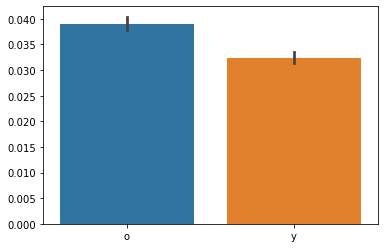

In [222]:
ax=sns.barplot(data=hv[['o','y']])

In [ ]:
# get TSS
mane_=source+'mane.gz'
tss=get_tss(mane_)
tss.to_csv('data/tss.csv')
print(round(time.time()-t))
# get exp
tpm=source+'gtex/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz'
exp=get_exp(tss,tpm)
exp.to_csv('data/exp.csv')
print(round(time.time()-t))